In [1]:
import numpy as np
from io_utils import loadGraph, permuteNoiseMat, writeEdgesToFile

A = loadGraph('metadata/phys.edges', 'd')

B = permuteNoiseMat(A,is_perm=True, has_noise=False)

writeEdgesToFile('metadata/phys-perm.edges', B)

In [2]:
from attr_utils import *

attributesA = getDirAttribute('metadata/phys.edges')
with open('metadata/attributesA', 'w') as f:
    for index, row in attributesA.iterrows():
        f.write(str(attributesA.ix[index]))

attributesB = getDirAttribute('metadata/phys-perm.edges')
with open('metadata/attributesB', 'w') as f:
    for index, row in attributesB.iterrows():
        f.write(str(attributesB.ix[index]))

In [5]:
from lsh_utils import *

combineAB = selectAndCombine(attributesA, attributesB)

bandDeg = ['Degree','InDegree','OutDegree']
bucketDeg = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 20)
with open('metadata/buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketEdge = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 20)
with open('metadata/buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())

bandScore = ['PageRank', 'HubsScore', 'AuthoritiesScore']
bucketScore = generateCosineBuckets(selectAndCombine(attributesA, attributesB, bandScore), 20)
with open('metadata/buckets-band-3', 'w') as f:
    for k, v in bucketScore.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketScore.items())

#band4 = ['Degree', 'NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
#bucket4 = generateBuckets(selectAndCombine(attributesA, attributesB, band4), 20)
#with open('metadata/buckets-band-4', 'w') as f:
#    for k, v in bucket4.items():
#        f.write(str(k) + str(v) + '\n')
#print len(bucket4.items())

#band5 = ['InDegree','OutDegree','PageRank', 'HubsScore', 'AuthoritiesScore']
#bucket5 = generateBuckets(selectAndCombine(attributesA, attributesB, band5), 20)
#with open('metadata/buckets-band-5', 'w') as f:
#    for k, v in bucket5.items():
#        f.write(str(k) + str(v) + '\n')
#print len(bucket5.items())

buckets = [bucketDeg, bucketEdge, bucketScore]

print combineAB

9
22
42
[['metadata/phys.edges' 1 0.029045643153526972 ..., 0.007673405358764931
  0.0012544408796638703 7.0]
 ['metadata/phys.edges' 2 0.03734439834024896 ..., 0.021185872006141936
  0.003325594603906599 7.0]
 ['metadata/phys.edges' 3 0.04564315352697095 ..., 0.017190695982055682
  0.005777803268066879 6.0]
 ..., 
 ['metadata/phys-perm.edges' 239 0.14107883817427386 ...,
  0.20591085665318698 0.5780647887843434 4.0]
 ['metadata/phys-perm.edges' 240 0.06639004149377593 ...,
  0.016652411816829988 0.02697772529362996 8.0]
 ['metadata/phys-perm.edges' 241 0.012448132780082987 ..., 0.0
  0.005339278406744424 0.0]]


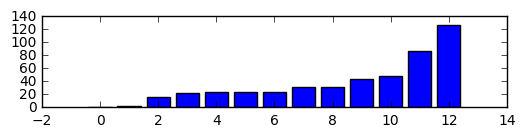

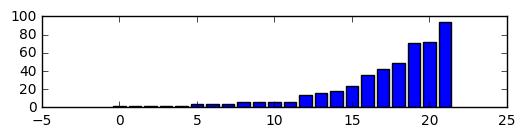

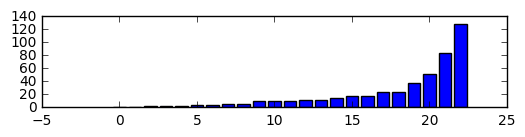

In [4]:
pair_count_dict = combineBucketsBySum(buckets, combineAB, 'metadata/phys.edges')
            
import matplotlib.pyplot as plt
plt.subplot(311)
plotBucketDistribution(bucketDeg)
plt.subplot(312)
plotBucketDistribution(bucketEdge)
plt.subplot(313)
plotBucketDistribution(bucketScore)
plt.show()

In [5]:
matching_matrix = computeMatchingMat(attributesA, attributesB, pair_count_dict)
sim_matrix = computeWholeSimMat(attributesA, attributesB)

In [6]:
show_list = [0, 10, 20, 50]
top_k = 5
for i in show_list:
    print "cos sim top %d for node %d:" %(top_k, attributesA['Id'][i])
    print attributesB['Id'][sim_matrix[i].argsort()[-top_k:]].values
    print "matching top %d for node %d:"%(top_k, attributesA['Id'][i])
    print attributesB['Id'][matching_matrix[i].argsort()[-top_k:]].values


cos sim top 5 for node 1:
[85  6 62 20 21]
matching top 5 for node 1:
[ 20 217  63  70  21]
cos sim top 5 for node 11:
[143  98 157 158  92]
matching top 5 for node 11:
[ 64 143  98 158  92]
cos sim top 5 for node 21:
[ 35 108  83  43   1]
matching top 5 for node 21:
[132  41 108 193 148]
cos sim top 5 for node 51:
[ 95 123 138 155  56]
matching top 5 for node 51:
[ 38  55  76 116 155]


In [8]:
bandDeg = ['Degree','InDegree','OutDegree']
bucketDeg = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandDeg), 2)
with open('metadata/euc-buckets-band-1', 'w') as f:
    for k, v in bucketDeg.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketDeg.items())

bandEdge = ['NodeBetweennessCentrality','FarnessCentrality', 'NodeEccentricity']
bucketEdge = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandEdge), 2)
with open('metadata/euc-buckets-band-2', 'w') as f:
    for k, v in bucketEdge.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketEdge.items())

bandScore = ['PageRank', 'HubsScore', 'AuthoritiesScore']
bucketScore = generateEuclideanBuckets(selectAndCombine(attributesA, attributesB, bandScore), 2)
with open('metadata/euc-buckets-band-3', 'w') as f:
    for k, v in bucketScore.items():
        f.write(str(k) + str(v) + '\n')
print len(bucketScore.items())

19
19
35
